In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# 读取GPU Utilization数据
with open('util.json') as f:
    data = json.load(f)

#result = data['data']['result'][0]
result = data['data']['result'][0]
#print(result)
#metric = result['metric']
values = result['values']
#print(values)
# 将数据转化为DataFrame格式
df1 = pd.DataFrame(values, columns=['time', 'gpu_utilization'])
#print(df1)
df1['time'] = pd.to_datetime(df1['time'], unit='s')
#print(df1)
df1['gpu_utilization'] = df1['gpu_utilization'].astype(int)
df1['time_sec'] = (df1['time'] - df1['time'][0]).dt.total_seconds()
#print(df1)

# 读取SM occupancy数据
with open('sm.json') as f:
    data = json.load(f)

result = data['data']['result'][0]
#metric = result['metric']
values = result['values']

# 将数据转化为DataFrame格式
df2 = pd.DataFrame(values, columns=['time', 'sm_occupancy'])
df2['time'] = pd.to_datetime(df2['time'], unit='s')
df2['sm_occupancy'] = df2['sm_occupancy'].astype(float)
df2['time_sec'] = (df2['time'] - df2['time'][0]).dt.total_seconds()

38


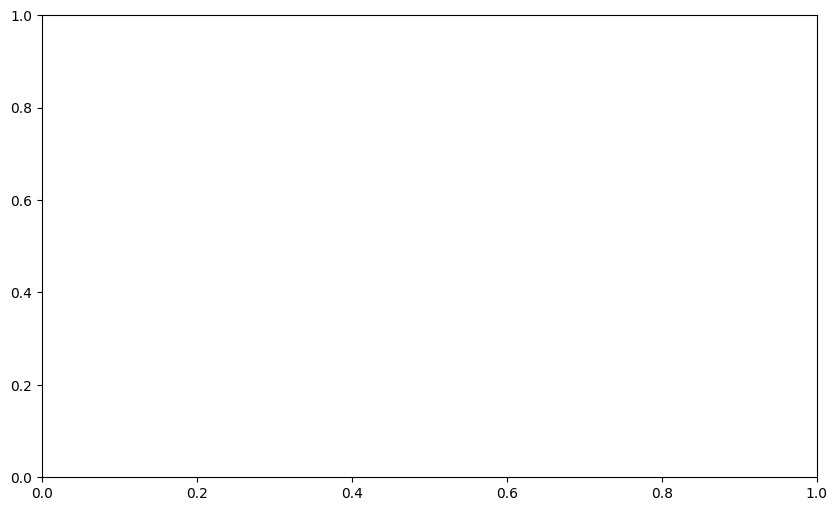

In [12]:
df = pd.merge(df1, df2, on='time_sec')
print(df['gpu_utilization'])

# 绘制图形
fig, ax1 = plt.subplots(figsize=(10, 6))

First non-zero index: 0
Last non-zero index: 1960
2023-04-11 12:07:47
2023-04-11 12:11:03
                      time_x  gpu_utilization  time_sec   
0    2023-04-11 12:07:47.000                0       0.0  \
1    2023-04-11 12:07:47.100                0       0.1   
2    2023-04-11 12:07:47.200                0       0.2   
3    2023-04-11 12:07:47.300                0       0.3   
4    2023-04-11 12:07:47.400                0       0.4   
...                      ...              ...       ...   
1956 2023-04-11 12:11:02.600                0     195.6   
1957 2023-04-11 12:11:02.700                0     195.7   
1958 2023-04-11 12:11:02.800                0     195.8   
1959 2023-04-11 12:11:02.900                0     195.9   
1960 2023-04-11 12:11:03.000                0     196.0   

                      time_y  sm_occupancy  
0    2023-04-11 12:07:47.000           0.0  
1    2023-04-11 12:07:47.100           0.0  
2    2023-04-11 12:07:47.200           0.0  
3    2023-04-11 12:07

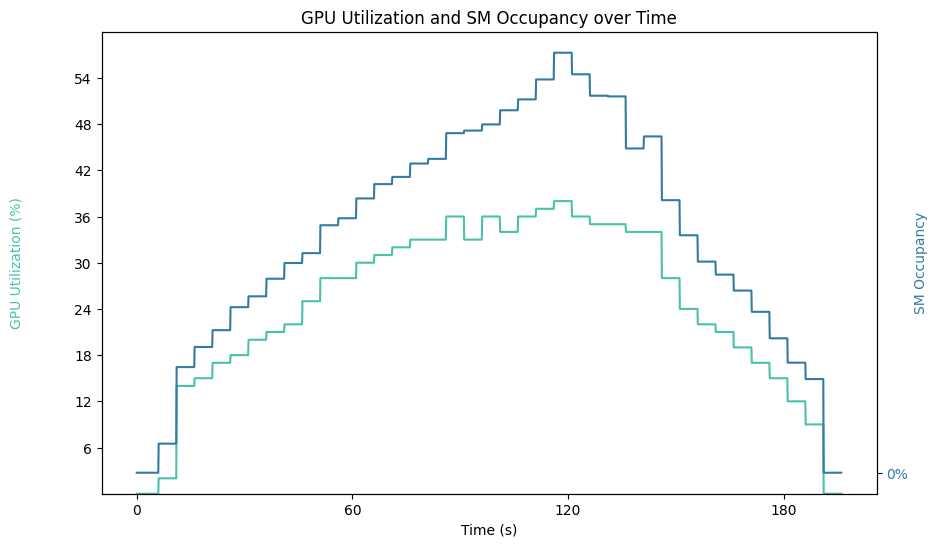

<Figure size 1600x600 with 0 Axes>

In [29]:
import numpy as np
import matplotlib.ticker as ticker

df = pd.merge(df1, df2, on='time_sec')
#print(df['gpu_utilization'])

first_nonzero_index = df['gpu_utilization'].first_valid_index()

last_nonzero_index = df['gpu_utilization'].last_valid_index()

print(f"First non-zero index: {first_nonzero_index}")
print(f"Last non-zero index: {last_nonzero_index}")

print(df['time_x'][first_nonzero_index])
print(df['time_x'][last_nonzero_index])


# 绘制图形
fig, ax1 = plt.subplots(figsize=(10, 6))



print(df)

palette = sns.color_palette("mako_r", 3)

# 绘制左侧纵坐标轴

color1 = palette[0]
sns.lineplot(data=df, x='time_sec', y='gpu_utilization', ax=ax1, color=color1)
#ax1 = ax1.flatten()
ax1.set_ylabel("GPU Utilization (%)", color=color1)
#ax1.tick_params(axis='y', labelcolor=color1)
#ax1.tick_params(axis='y')
ax1.yaxis.set_major_locator(ticker.MaxNLocator(integer=True, min_n_ticks=6, prune='both'))
ax1.set_ylim([0, 60])
ax1.yaxis.set_label_coords(-0.1, 0.5) 
#plt.xticks(np.arange(0, df["gpu_utilization"].max() + 10, 20), rotation=45)


# 绘制右侧纵坐标轴
ax2 = ax1.twinx()

color2 = palette[1]
sns.lineplot(data=df, x='time_sec', y='sm_occupancy', ax=ax2, color=color2)
ax2.set_ylabel('SM Occupancy', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(base=0.1))


# 设置横坐标轴
ax1.set_xlabel('Time (s)')
ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
#plt.xticks(rotation=45)
plt.xticks(np.arange(0, df["time_sec"].max(), 60), rotation=45)

plt.title('GPU Utilization and SM Occupancy over Time')
plt.figure(figsize=(16,6))

plt.show()